In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Set up inspector to take a look at the tables we're working with
inspector = inspect(engine)

In [10]:
# # Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# # Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
max_date = engine.execute('SELECT max(date) FROM Measurement').fetchall()
max_date

[('2017-08-23',)]

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


In [14]:
type(max_date)

list

In [15]:
max_date = max_date[0]


In [16]:
max_date = pd.to_datetime(max_date)
max_date

DatetimeIndex(['2017-08-23'], dtype='datetime64[ns]', freq=None)

In [17]:
# Calculate the date one year from the last date in data set.
year_date = max_date - pd.DateOffset(years=1)
year_date

DatetimeIndex(['2016-08-23'], dtype='datetime64[ns]', freq=None)

In [18]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame.from_records(precipitation_data, index='date', columns=['date', 'prcp'])
precipitation_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [20]:
# Sort the dataframe by date
precipitation_df.sort_values(by='date')

precipitation_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


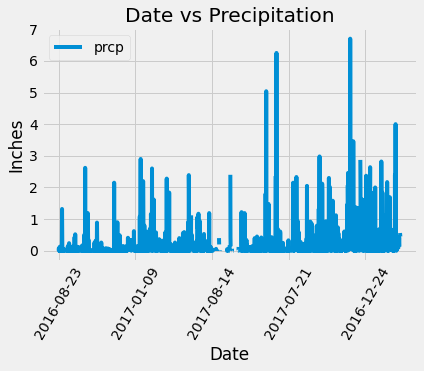

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=60)
plt.title("Date vs Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.savefig("Images/Precipitation_analysis.png")
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_station = active_stations[0][0]
max_station

'USC00519281'

In [26]:
# query just measurements from that station above
max_station_measurements = session.query(Measurement.id, Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.station == "USC00519281").all()
max_station_measurements

[(12188, '2010-01-01', 'USC00519281', 70.0),
 (12189, '2010-01-02', 'USC00519281', 62.0),
 (12190, '2010-01-03', 'USC00519281', 74.0),
 (12191, '2010-01-04', 'USC00519281', 75.0),
 (12192, '2010-01-05', 'USC00519281', 74.0),
 (12193, '2010-01-06', 'USC00519281', 76.0),
 (12194, '2010-01-07', 'USC00519281', 69.0),
 (12195, '2010-01-08', 'USC00519281', 66.0),
 (12196, '2010-01-09', 'USC00519281', 70.0),
 (12197, '2010-01-10', 'USC00519281', 75.0),
 (12198, '2010-01-11', 'USC00519281', 64.0),
 (12199, '2010-01-12', 'USC00519281', 60.0),
 (12200, '2010-01-13', 'USC00519281', 61.0),
 (12201, '2010-01-14', 'USC00519281', 68.0),
 (12202, '2010-01-15', 'USC00519281', 64.0),
 (12203, '2010-01-16', 'USC00519281', 66.0),
 (12204, '2010-01-17', 'USC00519281', 67.0),
 (12205, '2010-01-18', 'USC00519281', 70.0),
 (12206, '2010-01-19', 'USC00519281', 67.0),
 (12207, '2010-01-20', 'USC00519281', 67.0),
 (12208, '2010-01-21', 'USC00519281', 69.0),
 (12209, '2010-01-22', 'USC00519281', 60.0),
 (12210, '

In [27]:
# turn into dataframe
max_station_df = pd.DataFrame.from_records(max_station_measurements, index='id', columns=['id', 'date', 'station', 'tobs'])
max_station_df

,date,station,tobs
id,,,
12188,2010-01-01,USC00519281,70.0
12189,2010-01-02,USC00519281,62.0
12190,2010-01-03,USC00519281,74.0
12191,2010-01-04,USC00519281,75.0
12192,2010-01-05,USC00519281,74.0
...,...,...,...
14955,2017-08-14,USC00519281,77.0
14956,2017-08-15,USC00519281,77.0
14957,2017-08-16,USC00519281,76.0


In [28]:
# find and print max, min, and average
max_temp = max_station_df['tobs'].max()
min_temp = max_station_df['tobs'].min()
mean_temp = max_station_df['tobs'].mean()

print(f'Max temperature from station USC00519281: {max_temp}')
print(f'Max temperature from station USC00519281: {min_temp}')
print(f'Max temperature from station USC00519281: {mean_temp}')

Max temperature from station USC00519281: 85.0
Max temperature from station USC00519281: 54.0
Max temperature from station USC00519281: 71.66378066378067


In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_station_dates = session.query(Measurement.id, Measurement.date, Measurement.station, Measurement.tobs).\
filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= "2016-08-23").all()

max_station_dates

[(14608, '2016-08-23', 'USC00519281', 77.0),
 (14609, '2016-08-24', 'USC00519281', 77.0),
 (14610, '2016-08-25', 'USC00519281', 80.0),
 (14611, '2016-08-26', 'USC00519281', 80.0),
 (14612, '2016-08-27', 'USC00519281', 75.0),
 (14613, '2016-08-28', 'USC00519281', 73.0),
 (14614, '2016-08-29', 'USC00519281', 78.0),
 (14615, '2016-08-30', 'USC00519281', 77.0),
 (14616, '2016-08-31', 'USC00519281', 78.0),
 (14617, '2016-09-01', 'USC00519281', 80.0),
 (14618, '2016-09-02', 'USC00519281', 80.0),
 (14619, '2016-09-03', 'USC00519281', 78.0),
 (14620, '2016-09-04', 'USC00519281', 78.0),
 (14621, '2016-09-05', 'USC00519281', 78.0),
 (14622, '2016-09-06', 'USC00519281', 73.0),
 (14623, '2016-09-07', 'USC00519281', 74.0),
 (14624, '2016-09-08', 'USC00519281', 80.0),
 (14625, '2016-09-09', 'USC00519281', 79.0),
 (14626, '2016-09-10', 'USC00519281', 77.0),
 (14627, '2016-09-11', 'USC00519281', 80.0),
 (14628, '2016-09-12', 'USC00519281', 76.0),
 (14629, '2016-09-13', 'USC00519281', 79.0),
 (14630, '

In [30]:
# convert to dataframe
max_station_dates_df = pd.DataFrame.from_records(max_station_dates, index='id', columns=['id', 'date', 'station', 'tobs'])
max_station_dates_df

,date,station,tobs
id,,,
14608,2016-08-23,USC00519281,77.0
14609,2016-08-24,USC00519281,77.0
14610,2016-08-25,USC00519281,80.0
14611,2016-08-26,USC00519281,80.0
14612,2016-08-27,USC00519281,75.0
...,...,...,...
14955,2017-08-14,USC00519281,77.0
14956,2017-08-15,USC00519281,77.0
14957,2017-08-16,USC00519281,76.0


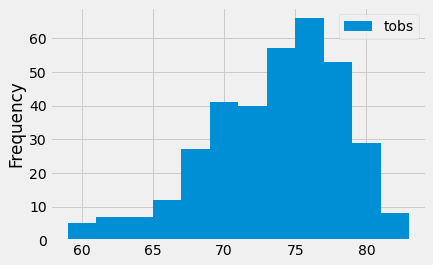

In [31]:
# Create histogram
max_station_dates_df.plot.hist(bins=12)
plt.savefig("Images/Temp Histogram.png")

# Close session

In [32]:
# Close Session
session.close()